In [2]:
!python3 --version

Python 3.11.13


In [3]:
!pip uninstall -y numpy pandas pycaret

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [4]:
!pip install numpy==1.24.4 pandas==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 116.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
pymc 5.23.0 requ

In [1]:
import numpy, pandas, sklearn
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("sklearn:", sklearn.__version__)

numpy: 1.24.4
pandas: 2.0.3
sklearn: 1.6.1


In [2]:
!pip install pycaret==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 6.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import setup

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
!ls /content/

creditcard.csv	logs.log  sample_data


### Since the data is very big, we'll sample 10000 rows randomly to use as our dataset, so that further computations are faster.

In [5]:
import pandas as pd
import numpy as np

# Use the file from Kaggle or your uploaded file name
csv_path = "/content/creditcard.csv"
df_raw = pd.read_csv(csv_path)

# Basic shape and peek
print(df_raw.shape)
df_raw.head(3)

# Dataset to use
df_raw_sampled = df_raw.sample(n=10000, random_state=42)
print(df_raw_sampled.shape)

(284807, 31)
(10000, 31)


In [6]:
df = df_raw_sampled.copy()
X = df.drop(columns=["Class"])
y = df["Class"].reset_index(drop=True)
X.shape, y.value_counts().to_dict()


((10000, 30), {0: 9984, 1: 16})

In [7]:
from pycaret.anomaly import *

exp = setup(
    data=X,
    session_id=42,
    use_gpu=True,
    normalize=True,
    transformation=False,  # Disable transformation to avoid BracketError
    verbose=True
)



,Description,Value
0,Session id,42
1,Original data shape,"(10000, 30)"
2,Transformed data shape,"(10000, 30)"
3,Numeric features,30
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [9]:
# Train a few models
iforest = create_model('iforest')
knn = create_model('knn')
lof = create_model('lof')
svm = create_model('svm')
cluster = create_model('cluster')

# Evaluate their internal metrics
models = [iforest, knn, lof, svm, cluster]
for m in models:
    print(f"\nModel: {m}")
    results = assign_model(m)
    print("Anomaly counts:\n", results['Anomaly'].value_counts())

# Choose your best model manually (Isolation Forest is generally good)
best = iforest


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]


Model: IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=42, verbose=0)
Anomaly counts:
 Anomaly
0    9500
1     500
Name: count, dtype: int64

Model: KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
Anomaly counts:
 Anomaly
0    9500
1     500
Name: count, dtype: int64

Model: LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)
Anomaly counts:
 Anomaly
0    9500
1     500
Name: count, dtype: int64

Model: OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)
Anomaly counts:
 Anomaly
0    9500
1     500
Name: count, dtype: int64

Model: CBLOFForceToDouble(alpha=0.9, beta=5, check_es

In [10]:
best = iforest
anomaly_results = assign_model(best)
anomaly_results.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Anomaly,Anomaly_Score
43428,41505.0,-16.526506,8.584971,-18.649853,9.505593,-13.793818,-2.832404,-16.701694,7.517344,-8.507059,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.190002,1,0.235695
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.119995,0,-0.028211
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.000000,0,-0.098046
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.500000,0,-0.097902
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.890000,0,-0.119179


In [12]:
plot_model(best, plot='tsne')


## Evaluate vs True Labels

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

pred = anomaly_results["Anomaly"].astype(int).reset_index(drop=True)
true = y.astype(int)

cm = confusion_matrix(true, pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(true, pred, digits=4))


Confusion Matrix:
 [[9496  488]
 [   4   12]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9511    0.9747      9984
           1     0.0240    0.7500    0.0465        16

    accuracy                         0.9508     10000
   macro avg     0.5118    0.8506    0.5106     10000
weighted avg     0.9980    0.9508    0.9733     10000



## Anomaly Score Distribution

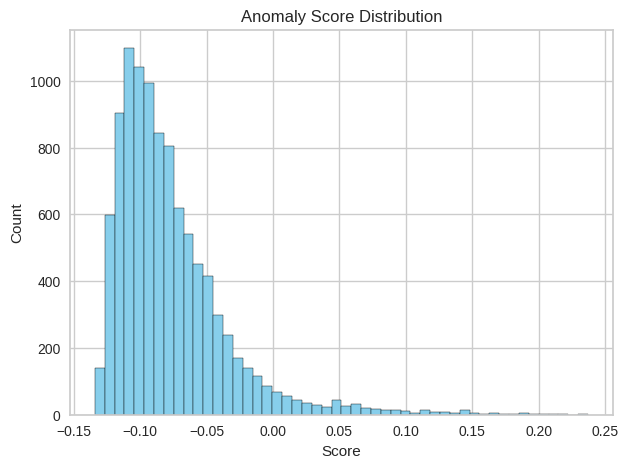

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(anomaly_results["Anomaly_Score"], bins=50, edgecolor="black", color="skyblue")
plt.title("Anomaly Score Distribution")
plt.xlabel("Score"); plt.ylabel("Count")
plt.show()


## PCA Visualization (2D)

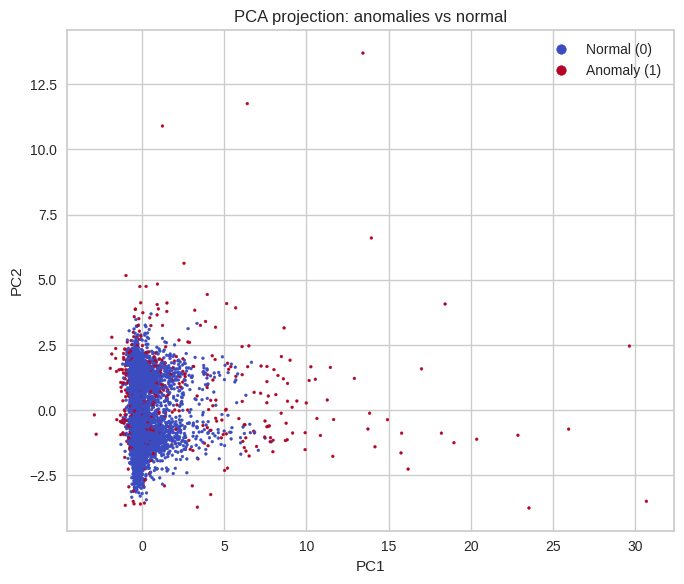

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Xs = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(Xs)

labels = anomaly_results["Anomaly"].astype(int).to_numpy()

plt.figure(figsize=(7,6))
sc = plt.scatter(Xp[:,0], Xp[:,1], c=labels, s=4, cmap="coolwarm")
plt.title("PCA projection: anomalies vs normal")
plt.xlabel("PC1"); plt.ylabel("PC2")
handles, texts = sc.legend_elements()
plt.legend(handles, ["Normal (0)", "Anomaly (1)"], loc="best")
plt.tight_layout()
plt.show()


## Save model

In [16]:
save_model(best, "creditcard_anomaly_detector")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  IForest(